In [1]:
#Assignment 2 

### Problem 1

### -  What happens to the price of a vanilla call option as the volatility tends to infinity? How about put option?
##### Solution : 
- Call option price moves close to Spot Price and Put Option price moves close to Strike Price at infinity.

#### - What happens to the price of a vanilla call option as the volatility tends to 0? How about put option?

### - What are the upper and lower bounds of the price of a call and put option on a non-dividend paying stock?

#### Solution : 
    * Upper Bound European Call Option :   
        Option Price (c) < Spot Price of the underlying stock (S)
        Option Price (P) < Strike Price * exp (- R * T)
                 
    * Lower Bound 
        *European Call Option: c >= max (  Spot Price -  Strike Price * exp (- R * T) )
        *European Put Option : p >= max ( Strike Price * exp (- R * T) - Spot Price )

Using Ito’s lemma, find the solution of the following SDE: dS(t) = μS(t)dt + σS(t)dW (t).

In [116]:
import pandas
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pylab as plt

def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def deltaCall( S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return 10*( np.exp(-r*T) * norm.cdf(d2) ) / ( S * sigma * np.sqrt(T))
    
def VegaCall( S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return (- np.exp(-r*T) * norm.cdf(d2) * d1 ) / ( sigma )

/Users/ankitrawat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/ankitrawat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


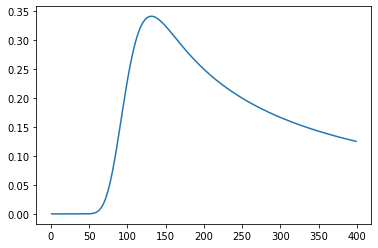

In [120]:
spot_price = np.arange(0,400,1)
r = 0.00
T = 1
sigma = 0.20
K = 100
summary = []
for spot in spot_price:
    delta = deltaCall(spot, K, r, sigma, T)
    summary.append([spot, delta])

df = pandas.DataFrame(summary, columns=['spot', 'delta'])
df.set_index('spot', drop=True, inplace=True)
plt.plot(df['delta'], label='Digital Option - Call - Delta')

/Users/ankitrawat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/Users/ankitrawat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


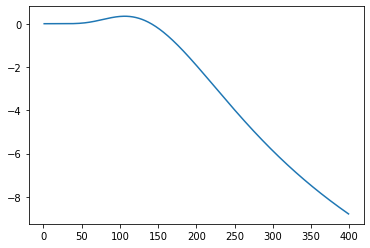

In [119]:
spot_price = np.arange(0,400,1)
r = 0.05
T = 5
sigma = 0.20
K = 200
summary = []
for spot in spot_price:
    Vega = VegaCall(spot, K, r, sigma, T)
    summary.append([spot, Vega])

df = pandas.DataFrame(summary, columns=['spot', 'Vega'])
df.set_index('spot', drop=True, inplace=True)
plt.plot(df['Vega'], label='Digital Option - Call - Vega')


In [121]:
S = 2000
r = 0.00
T = 1
sigma = 0.20
K = 2000
print (BlackScholesCall(S, K, r, sigma, T))

159.3113491081159


In [122]:
S = 2000
r = 0.00
T = 1
sigma = 0.15
K = 2200
print (BlackScholesCall(S, K, r, sigma, T))

50.00489613386139
